<a href="https://colab.research.google.com/github/soph1125/Computational-Physics/blob/main/Sophia_Pavia_Lab05_Part1__Simple_Harmonic_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 1: Collect Data and Plot Solution

* In the first part of this week's lab, we will collect data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        | amplitude  | m | the height of the oscillation |
| $\omega$ | omega | rad/sec | net change of angle per unit of time |
| $\phi$   | phi  | rad | phase constant |

## 0. Import modules

In the cell below, import numpy and matplotlib

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline
import math

## 1. Collecting Your Data

* Obtain some position vs. time data for a simple harmonic oscillator (mass on spring).

### Procedure

(3 pts)

* Briefly describe the procedure you used to set up your system and collect your data.  
* Take a picture of your experimental setup and upload it here.


**Your Answer Here** We collected the ring stand, spring, and weight, we added the weight to the end of the spring, and set up the Vernier device. After we set up the Vernier device, we ran the experiment and collected the data.

## 2. Upload Data Into Colab

(2 points)

* In the bottom left of your window, click on the `<>` icon to access `Code snippets`.

* Select `Open files from your local file system`, then `Insert`.

* Select your data files to upload, and upload them.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2024-02-19 at 3.58.01 PM.png to Screenshot 2024-02-19 at 3.58.01 PM.png


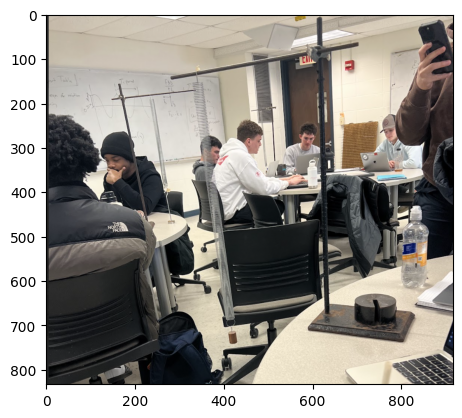

In [ ]:
myimage = image.imread("Screenshot 2024-02-19 at 3.58.01 PM.png")
plt.imshow(myimage)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving csv-export.csv to csv-export.csv
User uploaded file "csv-export.csv" with length 23375 bytes


In [ ]:
# use astropy to read in your data file
from astropy.table import Table


In [ ]:
data = Table.read("csv-export.csv")

In [ ]:
data

Data Set 1:Time(s),Data Set 1:Position(m),Data Set 1:Velocity(m/s),Data Set 1:Acceleration(m/s²),Data Set 2:Time(s),Data Set 2:Position(m),Data Set 2:Velocity(m/s),Data Set 2:Acceleration(m/s²),Data Set 3:Time(s),Data Set 3:Position(m),Data Set 3:Velocity(m/s),Data Set 3:Acceleration(m/s²)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.582499980926514,0.0392226378122965,-0.907177605010845,0.0,0.492000013589859,0.0486664639578925,1.67279696942847,0.0,0.623399972915649,-0.141833325227102,0.0267177912188166
0.05,0.585200011730194,0.00777795910835266,-1.35324810942014,0.05,0.492300003767014,0.120416490568055,1.79363986316286,0.1,0.608299970626831,-0.135374963283539,-0.0172035998584311
0.1,0.586300015449524,-0.0623001456260681,-2.00450233287281,0.1,0.497099995613098,0.241199831167857,1.55610364620332,0.2,0.597599983215332,-0.140899966160456,-0.0532291415664885
0.15,0.582099974155426,-0.189666748046875,-2.55856162420026,0.15,0.517799973487854,0.330833395322164,0.415838183260258,0.3,0.581399977207184,-0.154666635725233,-0.00859486560026807
0.2,0.570100009441376,-0.365166697237227,-1.98134769260148,0.2,0.53710001707077,0.293388946188821,-1.06237891187638,0.4,0.565299987792969,-0.154499957958857,0.149904370399905
0.25,0.543299973011017,-0.47572222020891,-0.0483294033709865,0.25,0.549799978733063,0.192888942029741,-1.48452684375239,0.5,0.547699987888336,-0.12516662478447,0.343998564338243
0.3,0.512600004673004,-0.389888783295949,2.43526763018267,0.3,0.555000007152557,0.110055804252625,-1.10821388937809,0.6,0.539099991321564,-0.0809999306996664,0.498960706646796
0.35,0.498199999332428,-0.176388952467177,3.18934782419676,0.35,0.558700025081635,0.0679445266723633,-0.555672548067423,0.7,0.530900001525879,-0.0227499008178711,0.636991284051795
0.4,0.499199986457825,-0.0170000394185384,2.72954248351815,0.4,0.560500025749207,0.061888661649492,-0.0978842672006583,0.8,0.534300029277802,0.0419166518582238,0.72955607816025


* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [ ]:
# save the time and position data
time = data["Data Set 3:Time(s)"]
position = data["Data Set 3:Position(m)"]

# subtract the mean of the position from the position
meanposition=position-np.mean(position)
print(meanposition)

Data Set 3:Position(m)
----------------------
  0.044230667671354196
   0.02913066538253628
  0.018430677971037257
 0.0022306719628891747
 -0.013869317451325802
 -0.031469317355958815
  -0.04006931392273072
  -0.04826930371841576
 -0.044869275966492816
   -0.0451693257482928
                   ...
   0.04733070524612226
   0.03843071850219526
   0.02013072164932117
  -0.00456932393631182
 -0.025569291988221776
  -0.04106930104812778
 -0.047269316593018806
 -0.039369316974488755
 -0.023169310966340784
-0.0014692863615437535
  0.021530715545805212
Length = 101 rows


## 3. Visualize and Analyze Your Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using python.

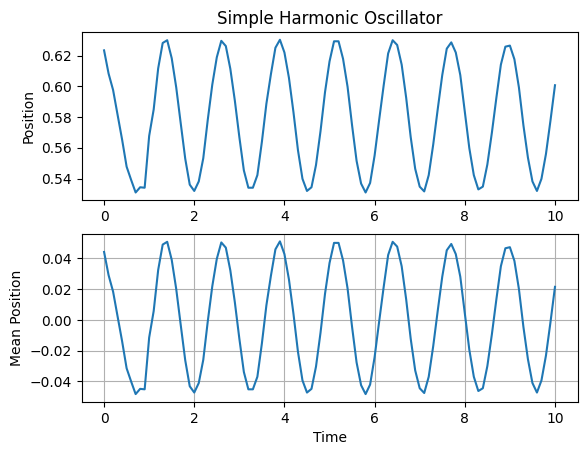

In [ ]:
# code to plot your position vs time data here
plt.figure()
plt.subplot(2,1,1)
plt.plot(time, position, label='Values')
plt.ylabel('Position')
plt.title('Simple Harmonic Oscillator')

plt.subplot(2,1,2)
plt.plot(time, meanposition, label='Values')
plt.xlabel('Time')
plt.ylabel('Mean Position')
plt.grid()

### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.
 - We looked at the graph that we derived from the data we collected.


In [ ]:
# values of period and amplitude from the graph

A = 0.05 # amplitude in m
T = 1.5  # period in sec

#### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [ ]:
# calculate omega

omega = (np.pi*2/T)
print(omega)

4.1887902047863905


#### Plot data and Analytic Solution

(5 points)

* copy your code for plotting the position versus time
* add code to overplot the analytic solution

* Determine the best value of $\phi$ using trial and error.


In [ ]:
# write a function to calculate the position of the SHO
def calculate_pos(A,omega,phi,t):
  position = A*np.cos(omega*t-phi)

  return position
# input = A, omega, phi, t
# return = position


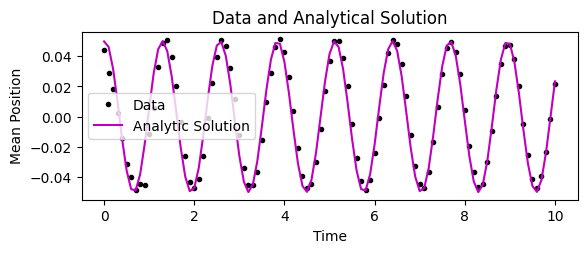

In [ ]:
# enter your code to plot your data and analytic solution
# be sure to use your function
plt.figure()
plt.subplot(2,1,1)
plt.plot(time, meanposition, 'k.', label='Data')
T = 1.275
omega = 2*np.pi/T
analytical_solution = calculate_pos(A,omega,0.1,time)
plt.plot(time, analytical_solution, 'm-', label = 'Analytic Solution')
plt.xlabel('Time')
plt.ylabel('Mean Position')
plt.title('Data and Analytical Solution')
plt.legend()


#### Calculate the spring constant and intial conditions

(3 points)

From your fit, and anything else you need to measure, determine:
* the spring constant, $k$
* the initial position, $x_0$
* the initial velocity, $v_{x0}$


In [ ]:
# calculate spring constant
m = .1 # this is in grams and this is the mass
T = 1.275 # This is the period
omega = 2*np.pi/T
spring_contstant = (omega**2) * m
print(spring_contstant)

2.428507042175006


In [ ]:
# calculate intial position here
initial_position = meanposition[0]
print(initial_position)

0.044230667671354196


In [ ]:
# calculate the intial velocity here
initial_velocity = (position[1] - position[0]) / (time[1] - time[0])
print(initial_velocity)

-0.15100002288817915
